# Video Search with Azure Computer Vision 4 (Florence)
## 2. Frames analysis

![image](logo.jpg)

In [1]:
import datetime
import os
import sys
import urllib

from azure import (
    describe_image_with_AzureCV4,
    view_image,
)

from cleanvision.imagelab import Imagelab
from dotenv import load_dotenv
from PIL import Image

## 1. Informations

In [2]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [3]:
print("Today is", datetime.datetime.today())

Today is 2023-05-12 08:05:56.183397


## 2. Frames

In [4]:
IMAGES_DIR = "frames"

os.makedirs(IMAGES_DIR, exist_ok=True)

In [5]:
image_extensions = [".jpg", ".jpeg", ".png"]

image_files = [
    os.path.join(IMAGES_DIR, f)
    for f in os.listdir(IMAGES_DIR)
    if os.path.splitext(f)[1] in image_extensions
]

print("Directory of images:", IMAGES_DIR)
print("Total number of catalog images =", "{:,}".format(len(image_files)))

Directory of images: frames
Total number of catalog images = 1,452


In [6]:
load_dotenv("azure.env")

key = os.getenv("azure_cv_key")
endpoint = os.getenv("azure_cv_endpoint")

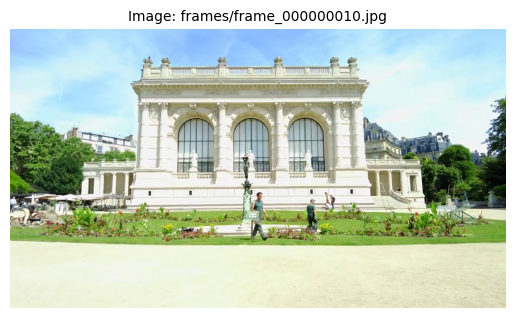

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a white building with columns and people walking in front of it with Musée Galliera in the background = 0.375

   Detected tags:
    outdoor            = 0.999
    sky                = 0.996
    tree               = 0.990
    cloud              = 0.990
    building           = 0.987
    plant              = 0.980
    palace             = 0.904
    estate             = 0.880
    mansion            = 0.875
    landscaping        = 0.852
    grass              = 0.850
    house              = 0.720
    park               = 0.591


In [7]:
idx = 10

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

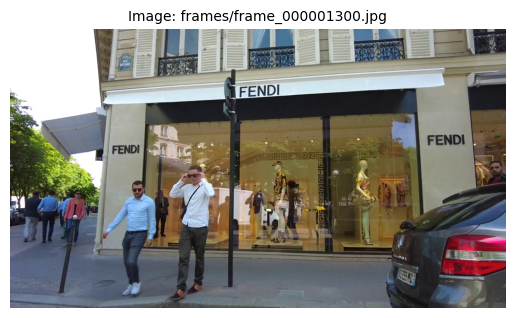

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a man standing on the sidewalk near a storefront = 0.365

   Detected tags:
    text               = 0.998
    outdoor            = 0.996
    building           = 0.991
    land vehicle       = 0.988
    vehicle            = 0.984
    footwear           = 0.953
    clothing           = 0.946
    vehicle registration plate = 0.934
    person             = 0.932
    family car         = 0.918
    jeans              = 0.897
    street             = 0.896
    mid-size car       = 0.887
    road               = 0.882
    car                = 0.871
    people             = 0.756
    store              = 0.701
    shop               = 0.662
    standing           = 0.605
    sidewalk           = 0.565
    city               = 0.444


In [8]:
idx = 1300

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

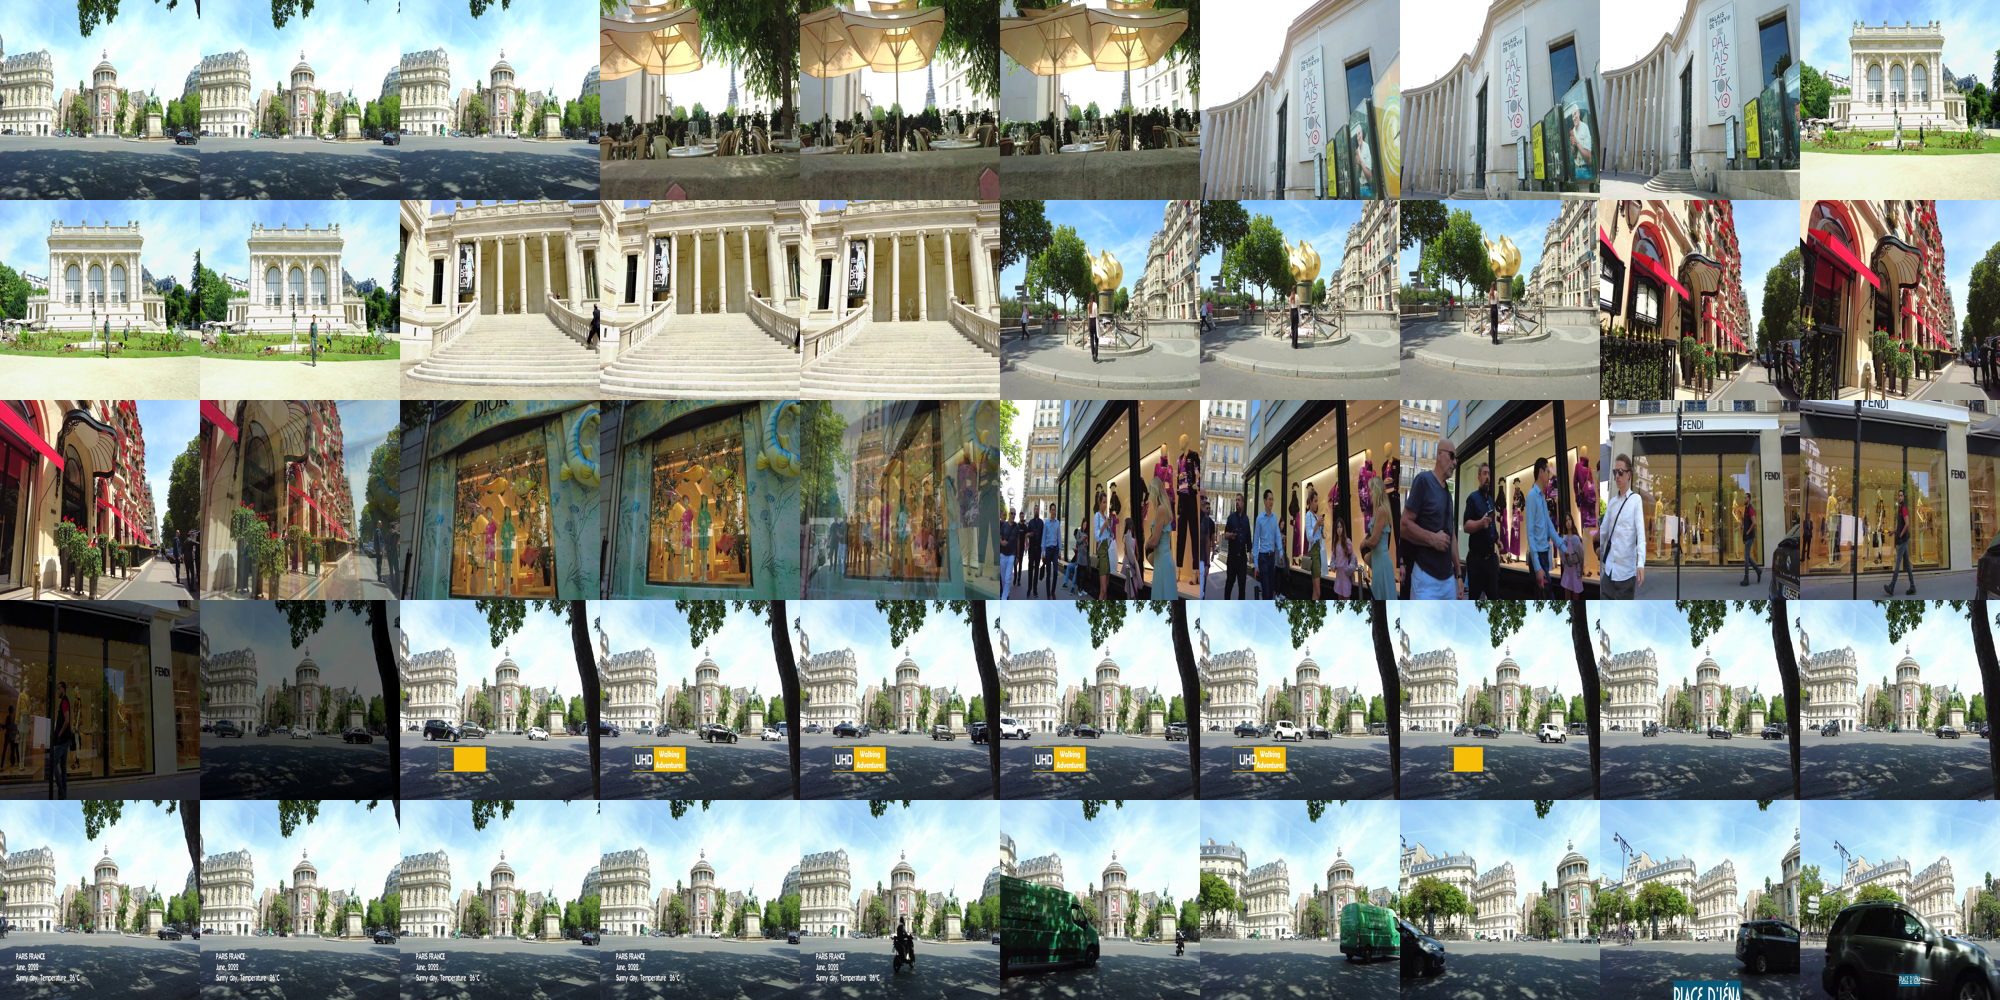

In [9]:
num_images_per_row = 10
num_images_per_col = 5
img_size = 200
start = 1

samples = image_files[start : start + (num_images_per_row * num_images_per_col)]

samples_images = Image.new(
    "RGB", (num_images_per_row * img_size, num_images_per_col * img_size)
)

# Load and resize the images
sample_images = [
    Image.open(image_file).resize((img_size, img_size)) for image_file in samples
]

# Paste the images onto the new image
for idx, img in enumerate(sample_images):
    x = (idx % num_images_per_row) * img_size
    y = (idx // num_images_per_row) * img_size
    samples_images.paste(img, (x, y))

samples_images

## 3. Checking images quality with ImageLab

In [10]:
imagelab = Imagelab(data_path=IMAGES_DIR)

Reading images from /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/florence/Video Search/frames


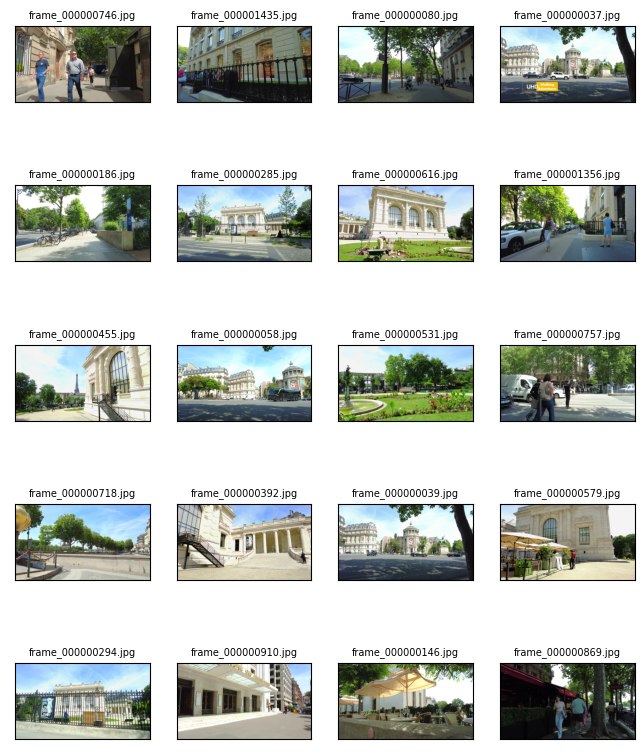

In [11]:
imagelab.visualize(num_images=20)

In [12]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████| 1452/1452 [00:57<00:00, 25.31it/s] 


Issue checks completed. To see a detailed report of issues found, use imagelab.report().


Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           11 |
|  1 | blurry          |            4 |
|  2 | low_information |            4 |
|  3 | dark            |            3 | 


Top 4 sets of images with near_duplicates issue
Set: 0


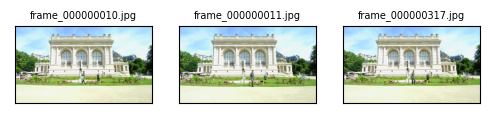

Set: 1


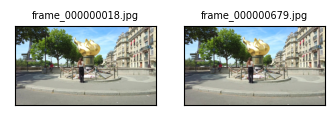

Set: 2


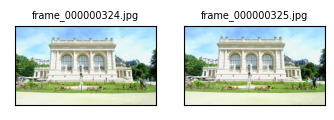

Set: 3


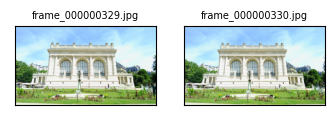


Top 4 examples with blurry issue in the dataset.


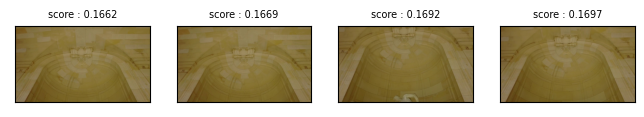


Top 4 examples with low_information issue in the dataset.


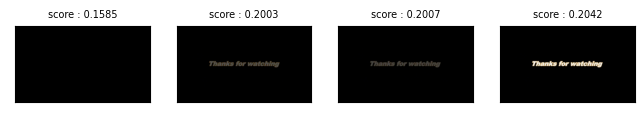

Found 3 examples with dark issue in the dataset.


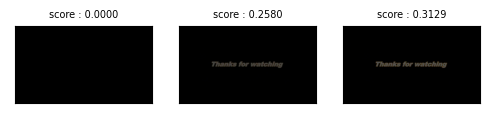

In [13]:
imagelab.report()

In [14]:
imagelab.issue_summary

issue_type num_images
0   near_duplicates         11
1            blurry          4
2   low_information          4
3              dark          3
4         grayscale          0
5             light          0
6  odd_aspect_ratio          0
7  exact_duplicates          0

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           11 | 


Top 4 sets of images with near_duplicates issue
Set: 0


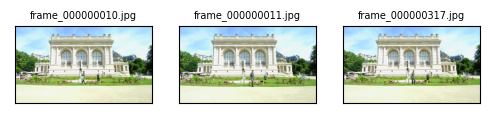

Set: 1


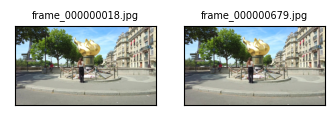

Set: 2


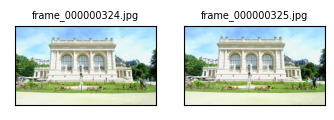

Set: 3


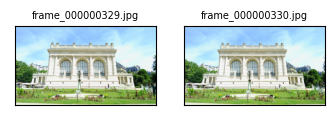

In [15]:
imagelab.report(["near_duplicates"])

In [16]:
imagelab.report(["odd_aspect_ratio"])

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  6 | odd_aspect_ratio |            0 | 

Found 0 example with odd_aspect_ratio issue in the dataset.


In [17]:
imagelab.report(["exact_duplicates"])

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  7 | exact_duplicates |            0 | 

Found 0 set of images with exact_duplicates issue in the dataset.


Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  3 | dark         |            3 | 

Found 3 examples with dark issue in the dataset.


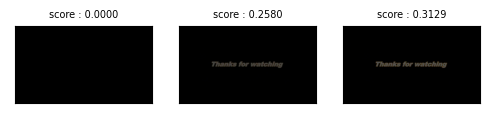

In [18]:
imagelab.report(["dark"])

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  2 | low_information |            4 | 


Top 4 examples with low_information issue in the dataset.


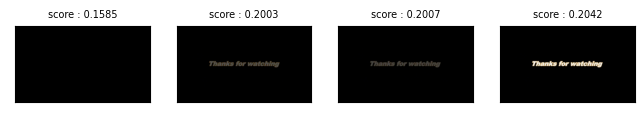

In [19]:
imagelab.report(["low_information"])

In [20]:
imagelab.report(["light"])

Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  5 | light        |            0 | 

Found 0 example with light issue in the dataset.


In [21]:
imagelab.report(["grayscale"])

Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  4 | grayscale    |            0 | 

Found 0 example with grayscale issue in the dataset.


In [22]:
imagelab.issues.head()

odd_aspect_ratio_score  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                  0.5625   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                  0.5625   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                  0.5625   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                  0.5625   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                  0.5625   

                                                    is_odd_aspect_ratio_issue  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      False   

                                                    low_information_score  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               0.158496   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               0.871182   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               0.831923   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               0.830743   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               0.896103   

                                                    is_low_information_issue  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                      True   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                     False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                     False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                     False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                     False   

                                                    light_score  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...     1.000000   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...     0.825493   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...     0.819241   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...     0.815462   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...     0.890557   

                                                    is_light_issue  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...           False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...           False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...           False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...           False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...           False   

                                                    grayscale_score  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                1   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                1   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                1   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                1   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...                1   

                                                    is_grayscale_issue  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...               False   

                                                    dark_score  is_dark_issue  \
/mnt/batch/tasks/shared/LS_root/mounts/clusters...    0.000000           True   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...    0.996436          False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...    1.000000          False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters...    1.000000          False   
/mnt/batch/tasks/shared/LS_root/mounts/clusters... 

### We are going to remove some existing black frames or frames with low information

In [23]:
dark_images = imagelab.issues[imagelab.issues["is_dark_issue"] == True].sort_values(
    by=["dark_score"]
)
dark_image_files = dark_images.index.tolist()

for path in dark_image_files:
    filename = os.path.basename(path)
    print(filename)

frame_000000000.jpg
frame_000001449.jpg
frame_000001451.jpg


In [24]:
len(dark_image_files)

3

In [25]:
low_info_images = imagelab.issues[
    imagelab.issues["is_low_information_issue"] == True
].sort_values(by=["low_information_score"])
low_info_images_files = low_info_images.index.tolist()

for path in low_info_images_files:
    filename = os.path.basename(path)
    print(filename)

frame_000000000.jpg
frame_000001451.jpg
frame_000001449.jpg
frame_000001450.jpg


In [26]:
len(low_info_images_files)

4

In [27]:
# Deduplicate lists
to_be_removed_list = list(set(dark_image_files + low_info_images_files))

for path in to_be_removed_list:
    filename = os.path.basename(path)
    print(filename)

frame_000001450.jpg
frame_000001451.jpg
frame_000000000.jpg
frame_000001449.jpg


In [28]:
for idx, file in enumerate(to_be_removed_list, start=1):
    filename = os.path.basename(file)
    print(idx, "Deleting frame:", filename)
    os.remove(os.path.join(IMAGES_DIR, filename))

print("\nDone: Number of deleted frames =", len(to_be_removed_list))

1 Deleting frame: frame_000001450.jpg
2 Deleting frame: frame_000001451.jpg
3 Deleting frame: frame_000000000.jpg
4 Deleting frame: frame_000001449.jpg

Done: Number of deleted frames = 4


> In the next notebook we will generate the images vectors embeddings